In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem : Linear Regression

You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

# 1.1.

# Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. 

In [2]:
#Reading the data
df= pd.read_csv("Firm_level_data.csv")
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [3]:
df.isnull().sum()

Unnamed: 0       0
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [5]:
df.dtypes

Unnamed: 0        int64
sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,759.0,379.000000,219.248717,0.000000,189.500000,379.000000,568.500000,758.000000
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160385,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [7]:
df.shape

(759, 10)

In [8]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.iloc[np.where(df["sales"]==max(df["sales"]))]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
295,135696.7882,93625.20056,774,30425.25586,710.799925,yes,0.559656,42499.13324,41.8


In [11]:
df.iloc[np.where(df["sales"]==min(df["sales"]))]

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
49,0.138,1.512,22,9.3931,0.046,no,18.816427,36.292813,6.11


# EDA

# Histogram 

In [12]:
dfcolumns=['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq',
       'value', 'institutions']

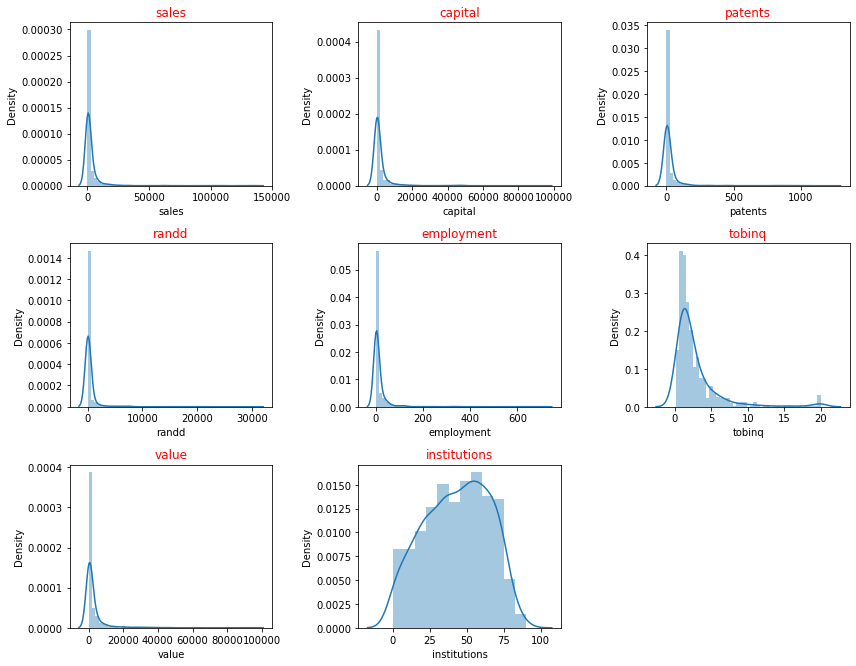

In [13]:

fig=plt.figure(figsize=(12,12))
for i in range(0,len(dfcolumns)):
   ax=fig.add_subplot(4,3,i+1)
   sns.distplot(df[dfcolumns[i]])
   ax.set_title(dfcolumns[i],color='Red')
plt.tight_layout()

# As we can from the Histogram Plots ,variables ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq','value'] are rightly skewed means that Data is not normally distriburted .

# The variable['institutions'] seem to be normally distributed

# CORRELATION

In [14]:
df.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

In [15]:
num_var=['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq',
       'value', 'institutions']

<AxesSubplot:>

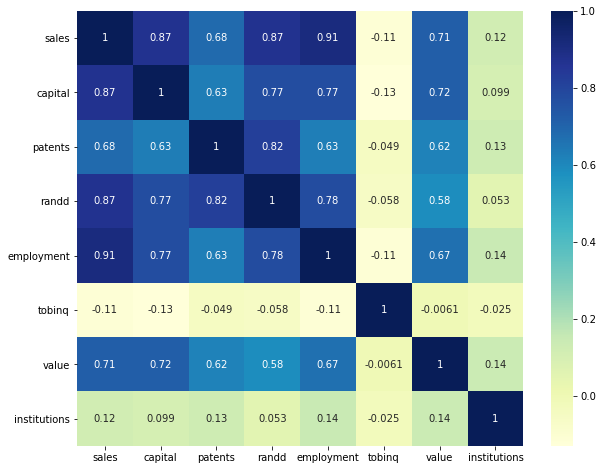

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_var].corr(),cmap="YlGnBu",annot=True)

# As we can see from the correlation heatmap that variable "patents" and "randd" are highly correlated to each other.

# BOXPLOT

<AxesSubplot:>

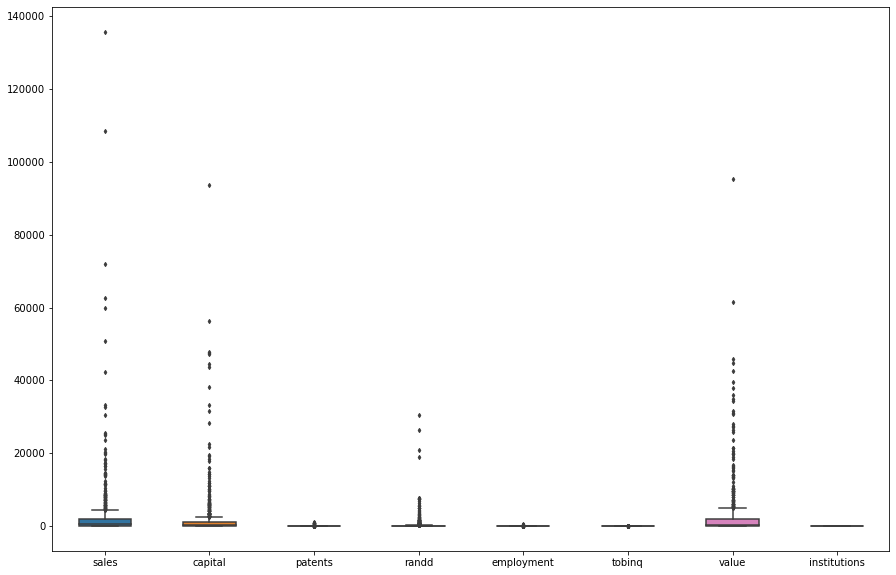

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

# As we can see from the boxplot all the variables have outliers but we cant remove the outliers beacuse dataset is small.

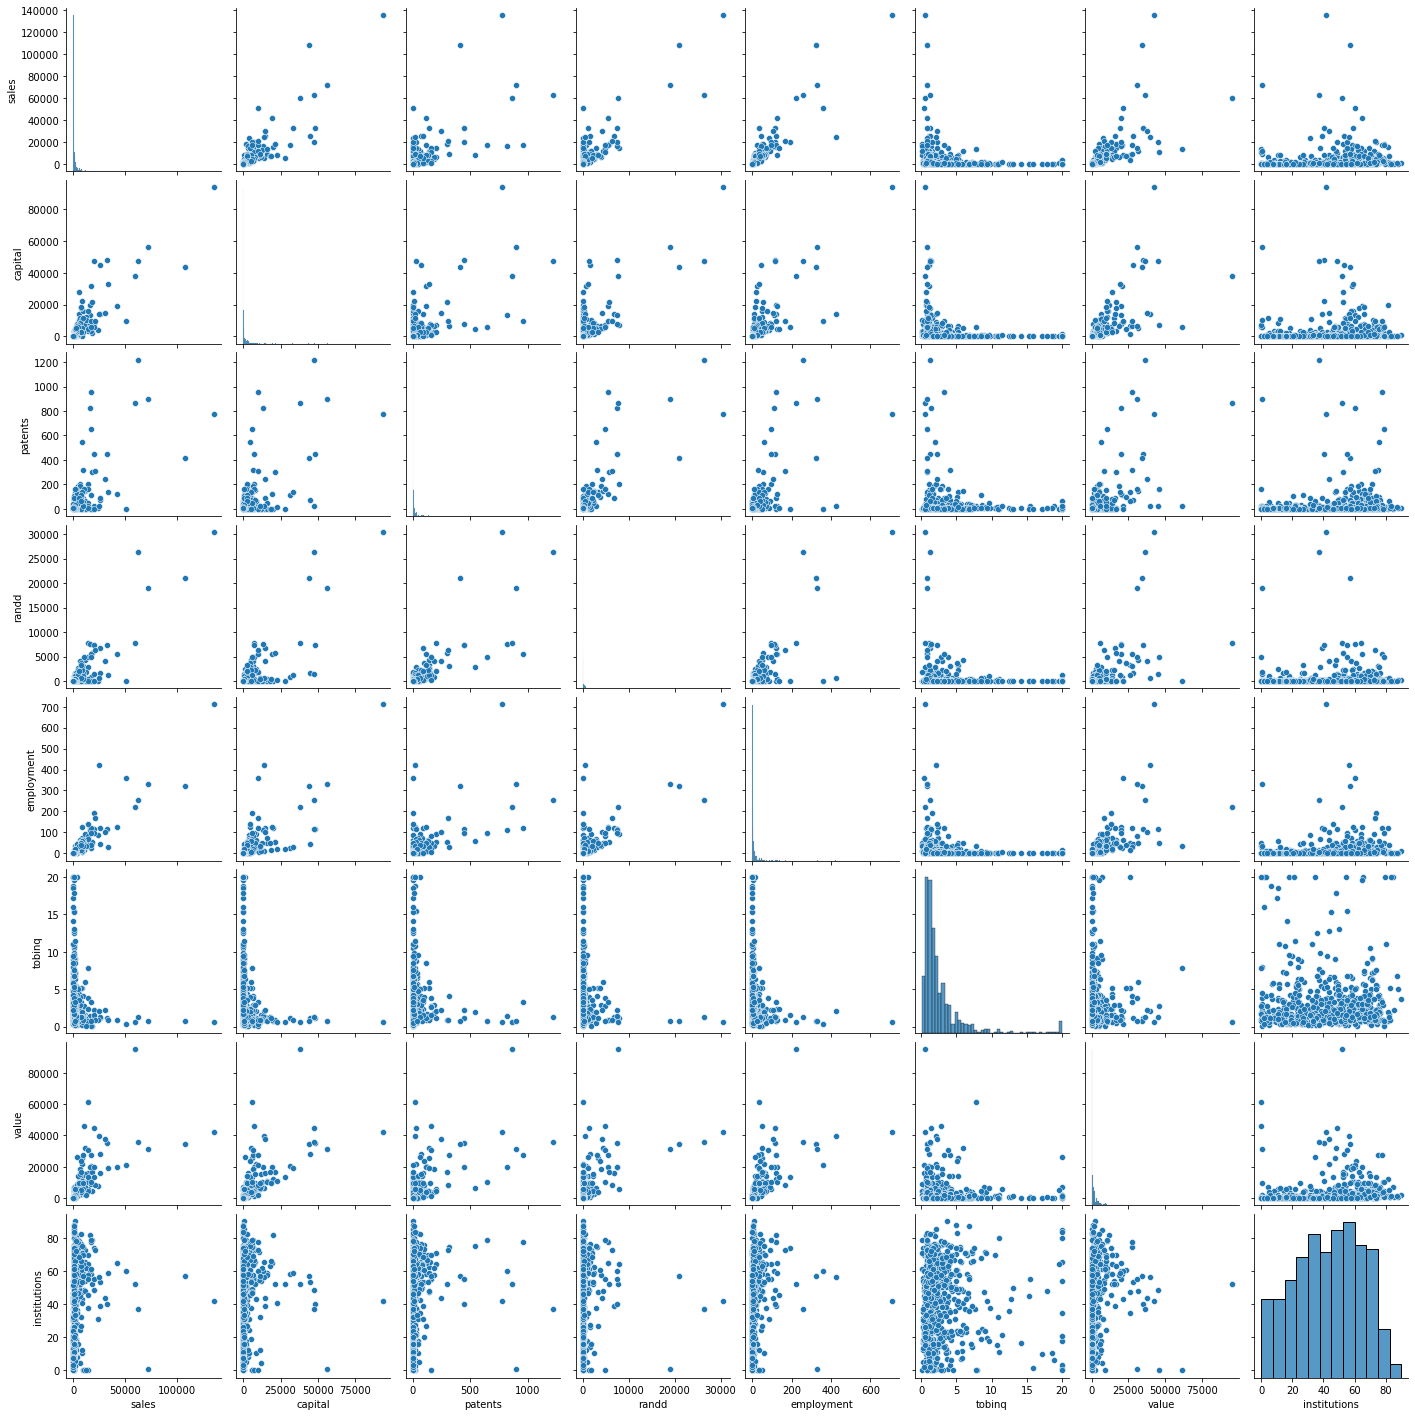

In [18]:
sns.pairplot(df)

# 1.2. Impute null values if present? Do you think scaling is necessary in this case? 

In [19]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

# Imputation is not needed because there are only 21 values which are null in 'tobinq' column ,we can simply drop those values.

In [20]:
df=df.dropna()

In [21]:
df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

# Yes scaling is necessary since the dataset is not normally distributed and as we can see all the columns have their own range of distribution and because of that  the algorithum might not work properly is why scaling of the dataset is required. 

# 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE. 

In [22]:
#Encoding the dataset

In [23]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [24]:
df1= pd.get_dummies(df)

In [25]:
df1.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_no,sp500_yes
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,1,0
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,1,0
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,0,1
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,1,0
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,1,0


In [26]:
df1.shape

(738, 10)

# Splitting the dataset

In [27]:
X= df1.drop("sales",axis=1)
y= df1["sales"]

# Scaling of the dataset

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['capital','patents', 'randd','employment', "tobinq",
       'value',"institutions", 'sp500_no','sp500_yes'])

In [29]:
X.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_no,sp500_yes
0,0.001725,0.008197,0.012558,0.003236,0.549797,0.017055,0.890405,1.0,0.0
1,0.001304,0.001639,0.000000,0.002608,0.036476,0.002533,0.654687,1.0,0.0
2,0.066447,0.113115,0.108354,0.069856,0.255835,0.271703,0.529118,0.0,1.0
3,0.002850,0.000820,0.002746,0.004312,0.009367,0.000641,0.298170,1.0,0.0
4,0.001496,0.001639,0.000468,0.002731,0.047498,0.000687,0.548641,1.0,0.0


# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=16)

# Linear regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#Performance of prediction on train set

In [34]:
lr.score(x_train,y_train)

0.9231828383630586

In [35]:
#r2

In [36]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,lr.predict(x_train))
r2_train

0.9231828383630586

In [37]:
#RMSE

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,lr.predict(x_train))))

RMSE: 2231.2961798939587


In [39]:
#Performance of prediction on test set

In [40]:
lr.score(x_test,y_test)

0.8842133828141475

In [41]:
#r2

In [42]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test,lr.predict(x_test))
r2_test

0.8842133828141475

In [43]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lr.predict(x_test))))

RMSE: 3545.7901768414704


In [50]:
print("R2_train:",r2_score(y_train,lr.predict(x_train)))
print("R2_test:",r2_score(y_test,lr.predict(x_test)))
print('RMSE_Train:', np.sqrt(metrics.mean_squared_error(y_train,lr.predict(x_train))))
print('RMSE_Test:', np.sqrt(metrics.mean_squared_error(y_test,lr.predict(x_test))))

R2_train: 0.9231828383630586
R2_test: 0.8842133828141475
RMSE_Train: 2231.2961798939587
RMSE_Test: 3545.7901768414704


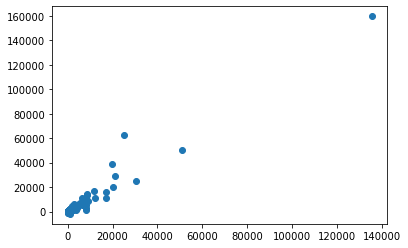

In [45]:
plt.scatter(y_test,lr.predict(x_test))

In [46]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [47]:
X.shape

(738, 9)

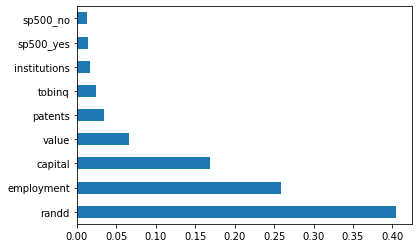

In [48]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()